# Sorting algorithms

## Ploting functions

In [496]:
import random
import time
import matplotlib.pyplot as plt

In [497]:
def plot(plot_index, plot_arr_size, plot_time, algorithm_name, title):
    plt.subplot(1, 3, plot_index)
    plt.plot(plot_arr_size, plot_time, label = algorithm_name)

    plt.xlabel('array size')
    plt.ylabel('time taken')
    
    plt.title(title)
    plt.legend()

In [498]:
def get_dataset(type, size):
    if type == 'random':
        arr = list(range(size))
        random.shuffle(arr)
    elif type == 'ascending':
        arr = list(range(size))
    elif type == 'descending':
        arr = list(range(size))
        arr.reverse()
    return arr

In [499]:
def sub_test(algorithm, plot_index, dataset_type='random', arr_size = 10, max_arr_size = 200, iterations = 200, step = 10):
    plot_arr_size = []
    plot_time = []

    arr = get_dataset(dataset_type, arr_size)

    while arr_size <= max_arr_size:
        duration = 0

        for _ in range(iterations):
            start = time.time()
            algorithm.sort(arr, len(arr) - 1)
            end = time.time()
            duration += end - start
            arr = get_dataset(dataset_type, arr_size)

        plot_arr_size.append(arr_size)
        plot_time.append(duration)

        arr_size += step

    plot(plot_index, plot_arr_size, plot_time, algorithm.__name__, dataset_type)

In [500]:
def test(*args):
    plt.figure(figsize=(30, 10))
    
    for algorithm in args:
        sub_test(algorithm, 1)
        sub_test(algorithm, 2, 'ascending')
        sub_test(algorithm, 3, 'descending')

    plt.show()

# Bubble sort

Bubble sort is the simplest sorting algorithm that works by repeatedly stepping through the list to be sorted, comparing each pair of adjacent items, and swapping them if they are in the wrong order. The algorithm gets its name because smaller elements "bubble" to the top of the list.

In [501]:
class bubble_sort():

    @staticmethod
    def sort(arr, *args):
        for i in range(len(arr)):
            for j in range(len(arr) - i - 1):
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j+1], arr[j]

### Time complexity
Bubble sort is one of the worst sorting algorithms as it's time complexity is always O($n^2$)

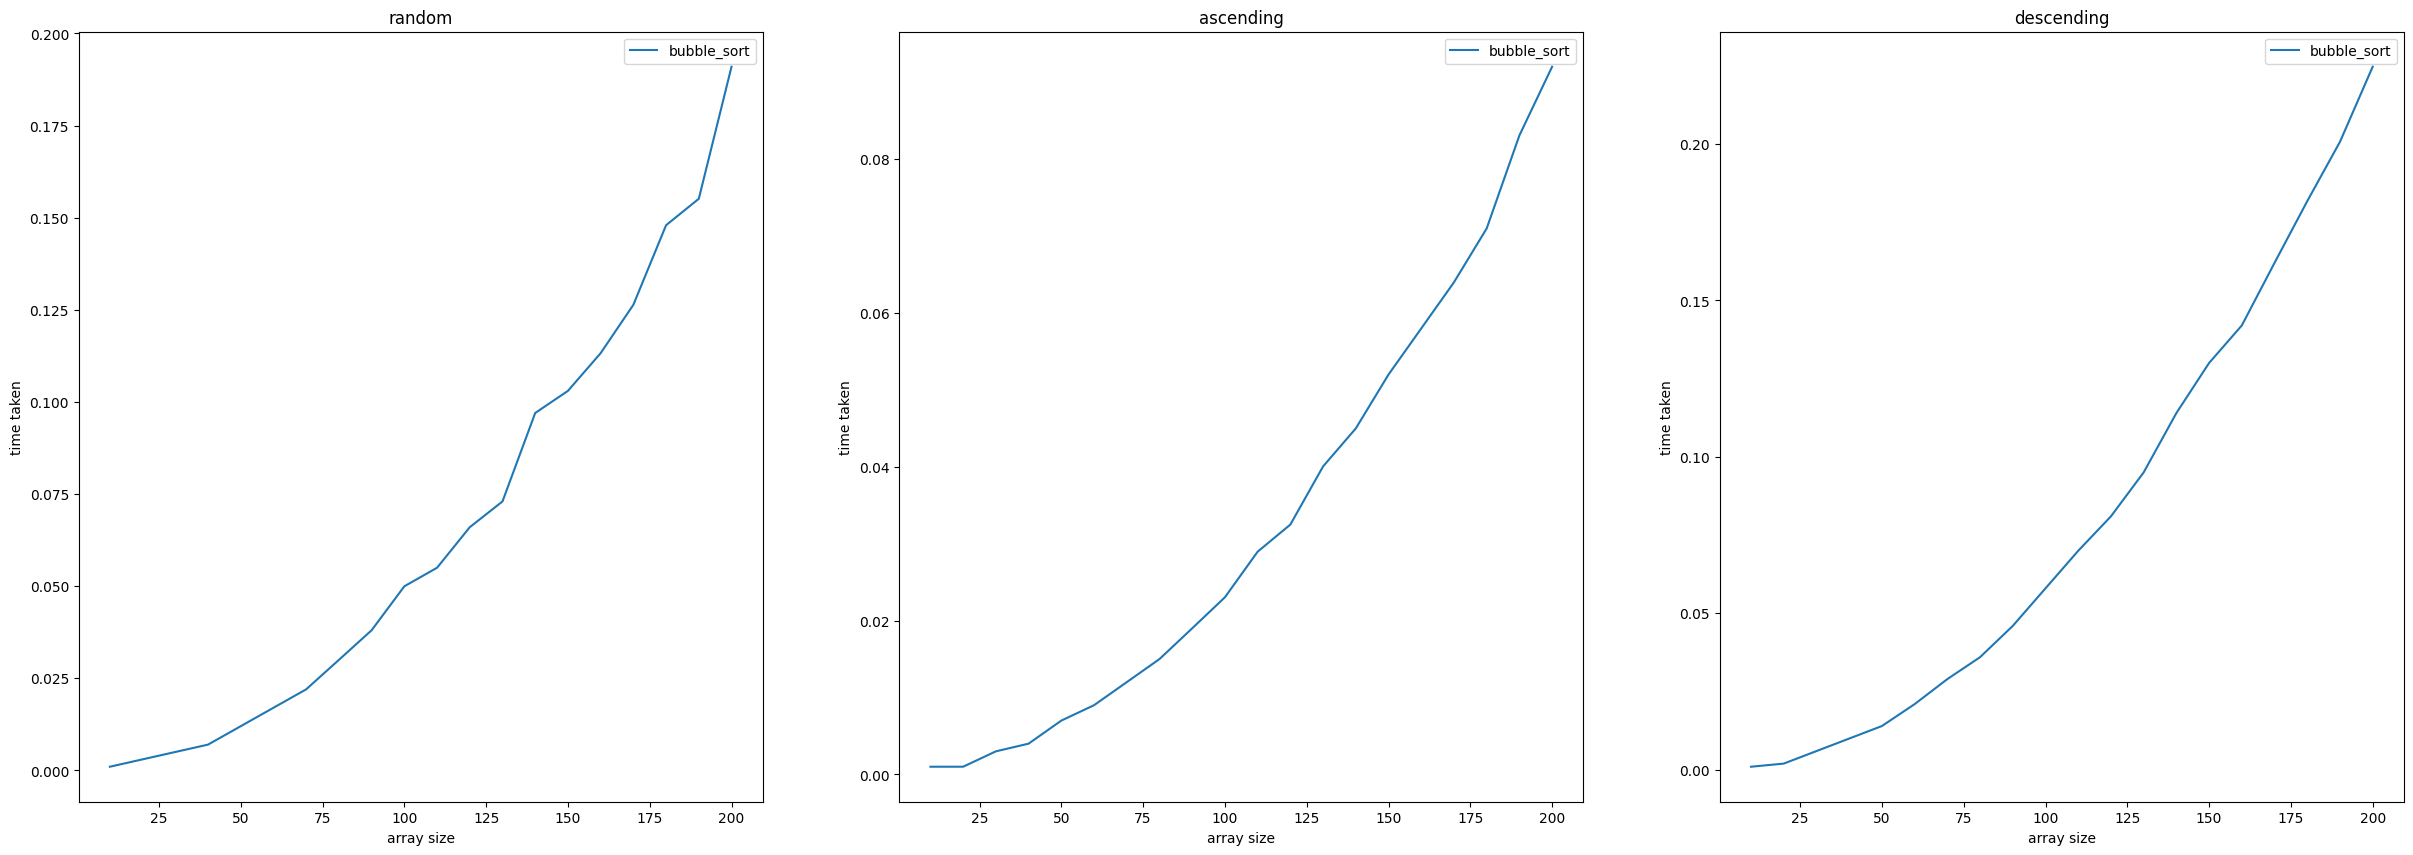

In [502]:
test(bubble_sort)

### Auxiliary space
Bubble sort is an in-place sorting algorithm, which simply means that it uses no extra space apart from the provided array. So it's auxiliary space can be described as O($1$).

# Insertion sort

Insertion sort is a simple sorting algorithm that works by iteratively inserting each element of an unsorted list into its correct position in a sorted portion of the list.

In [503]:
class insertion_sort():

    @staticmethod
    def sort(arr, *args):
        for i in range(1, len(arr)):
            key = arr[i]
            j = i-1

            while j >= 0 and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

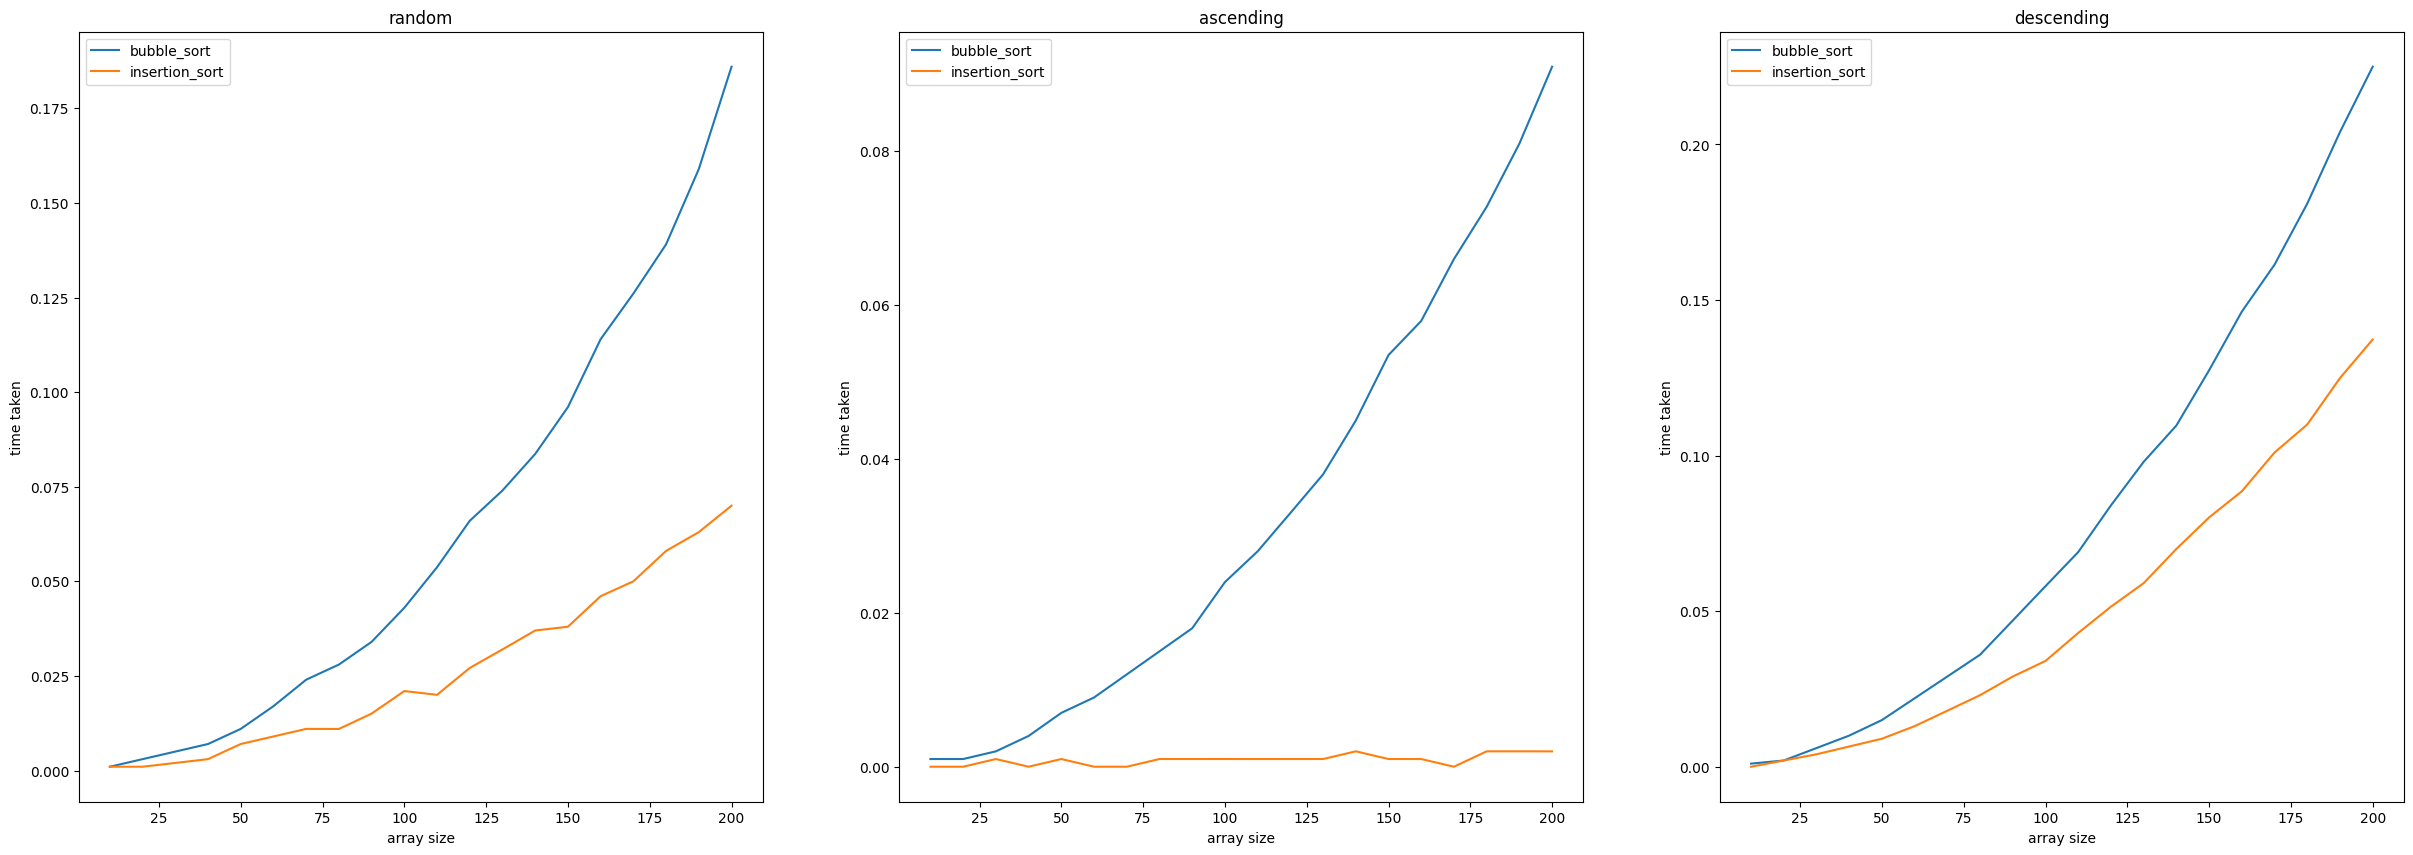

In [504]:
test(bubble_sort, insertion_sort)

## Time compexity

Insertion sort is a little bit more complicated than bubble sort. If the array is already sorted it performs only one operation for each element and moves to the next, so the *best case* time complexity is O($n$). But when the array is sorted and reversed for each element, on average, it iterates over half the array. In this case the time complexity is O($n^2$). So with random example the average time complexity is something in between those two so we say that it is also O($^2$).

|   worst  | average  |  best  |
| ---------|----------|--------|
| O($n^2$) | O($n^2$) | O($n$) |

## Auxiliary space

As it is also in-place algorithm it's O($1$).

# Merge sort

Merge Sort divides the input array into two halves, recursively sorts each half, and then merges the two sorted halves back together. This process continues until the entire array is sorted and is often called divide-and-conquer.

- Divide: Split the array into two halves.
- Conquer: Recursively sort both halves.
- Combine: Merge the two sorted halves into a single sorted array.

In [505]:
class merge_sort():

    @staticmethod
    def merge(arr, left, mid, right):
        n1 = mid - left + 1
        n2 = right - mid

        l = arr[left:left+n1]
        r = arr[mid+1:right+1]

        i = 0
        j = 0
        k = left

        while i < n1 and j < n2:
            if l[i] <= r[j]:
                arr[k] = l[i]
                i += 1
            else:
                arr[k] = r[j]
                j += 1
            k +=1

        while i < n1:
            arr[k] = l[i]
            i += 1
            k += 1

        while j < n2:
            arr[k] = r[j]
            j += 1
            k += 1

    @staticmethod
    def sort(arr, right, left=0):
        if left < right:
            mid = left + (right - left) // 2
            
            merge_sort.sort(arr, mid, left)
            merge_sort.sort(arr, right, mid+1)
            merge_sort.merge(arr, left, mid, right)

In [ ]:
test(bubble_sort, insertion_sort, merge_sort)

## Time complexity

Merge sort has the best big-O complexity of all sorting algorithms as it's always O($nlog(n)$).

|   worst  | average  |  best  |
| ---------|----------|--------|
| O($nlog(n)$) | O($nlog(n)$) | O($nlog(n)$) |

## Auxiliary space

Huge disadvantage of merge sort is that it isn't in-place sorting algorithm. It uses O($n$) additional space for subarays, which are later merged together while writing to the original array.

# Quick sort

QuickSort works by selecting a "pivot" element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. It also folows divide-and-conquer rule.

- Choose a Pivot: Select an element from the array as the pivot.
- Partition: Rearrange the array so that elements less than the pivot are on the left, and elements greater than the pivot are on the right.
- Recursively Apply: Recursively apply the above steps to the left and right sub-arrays.

In [ ]:
class quick_sort():

    @staticmethod
    def sort(arr, end, start=0):
        if start < end:
            pivot = quick_sort.partition(arr, start, end)
            quick_sort.sort(arr, pivot-1, start)
            quick_sort.sort(arr, end, pivot+1)

    @staticmethod
    def partition(arr, start, end):
        pivot = arr[end]
        i = start - 1

        for j in range(start, end):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        
        arr[i+1], arr[end] = arr[end], arr[i+1]
        return i+1

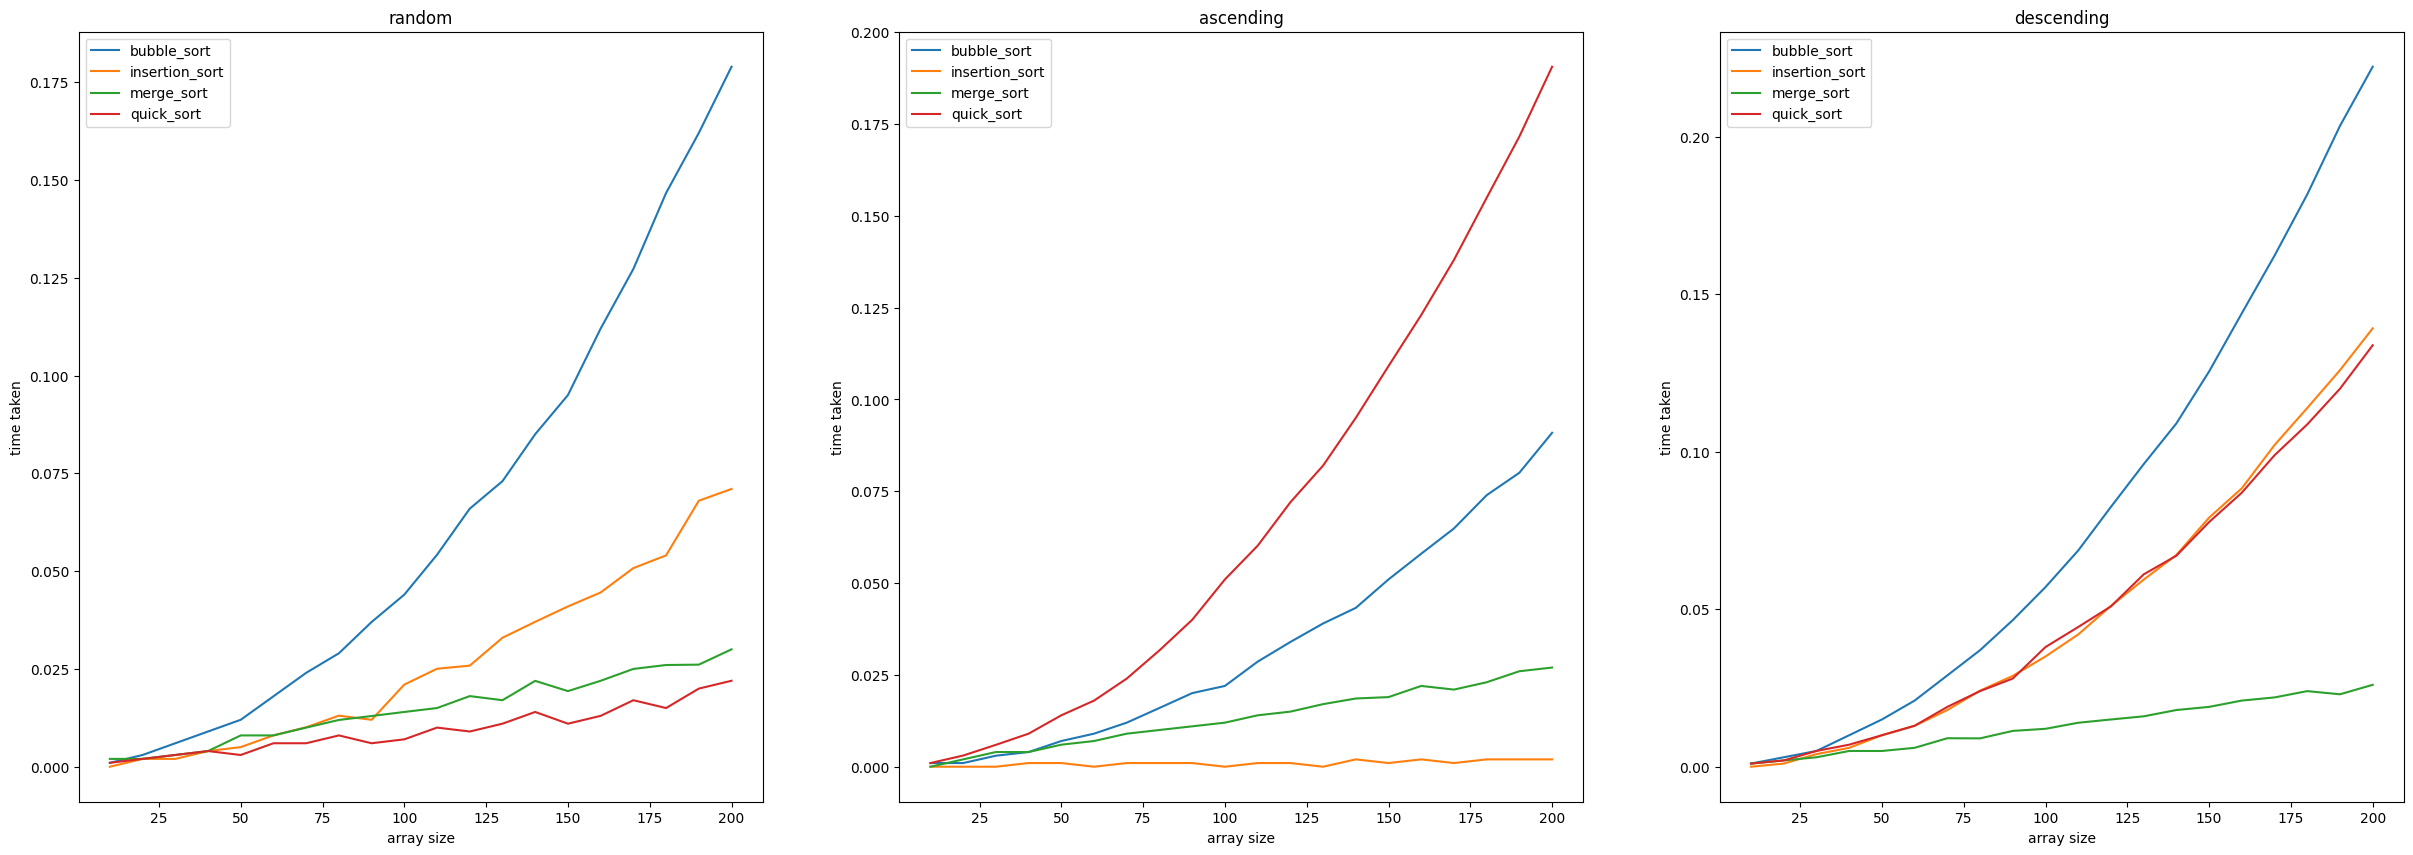

In [ ]:
test(bubble_sort, insertion_sort, merge_sort, quick_sort)

## Time complexity

Quick sort time complexity is hard to determine exactly, because it is mostly dependent on the pivot choose. If the pivot will always partition an array into two halves we achieve the time complexity of O($nlog(n)$).
But if the pivot will always be the smallest or the largest element the time complexity will be O($n^2$). On average The pivot will divide an array into two parts, which also gives us O($nlog(n)$). Overal the results are quite surprising as quick sort can be significantly faster than merge sort on average and way worse than bubble sort in the worst case scenario.

|   worst  | average  |  best  |
| ---------|----------|--------|
| O($n^2$) | O($nlog(n)$) | O($nlog(n)$) |

# Task

The quick sort algorithm isn't always the same. There are many variants with different pivot choosing and array partitioning methods. The version shown above is far from being perfect. Create at least 3 different variants of this algorithm and see how much further it can be improved.

In [ ]:
class quick_sort_2():

    @staticmethod
    def sort(arr, end, start=0):
        if start < end:
            pivot = quick_sort.partition(arr, start, end)
            quick_sort.sort(arr, pivot-1, start)
            quick_sort.sort(arr, end, pivot+1)

    # You are supposed to change only this function
    @staticmethod
    def partition(arr, start, end):
        pivot = arr[end]
        i = start - 1

        for j in range(start, end):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        
        arr[i+1], arr[end] = arr[end], arr[i+1]
        return i+1

In [ ]:
test(quick_sort, quick_sort_2)